In [1]:
import jax.numpy as jnp
import numpy as np

In [2]:
neuron_positions = jnp.array([
    [1, 2],  # Neuron 0 is at (1, 2) on the grid
    [0, 1],  # Neuron 1 is at (0, 1)
    [2, 0],  # Neuron 2 is at (2, 0)
    # Add more neurons as needed
])

# Sorting the neurons based on their spatial positions (e.g., by rows first, then columns)
# This is a basic lexicographic sort by (row, col)
sorted_indices = jnp.lexsort((neuron_positions[:, 1], neuron_positions[:, 0])) # sort by row, then column 


In [3]:
sorted_indices

Array([1, 0, 2], dtype=int32)

In [4]:
neuron_positions[sorted_indices]

Array([[0, 1],
       [1, 2],
       [2, 0]], dtype=int32)

In [16]:
input_weights = jnp.array([[1,50,25], [2,3,4], [3,4,5]])
input_weights

Array([[ 1, 50, 25],
       [ 2,  3,  4],
       [ 3,  4,  5]], dtype=int32)

In [20]:
a = input_weights[:, sorted_indices]
b = a[sorted_indices, :]
b

Array([[ 3,  2,  4],
       [50,  1, 25],
       [ 4,  3,  5]], dtype=int32)

In [21]:
input_weights[jnp.ix_(sorted_indices, sorted_indices)]

Array([[ 3,  2,  4],
       [50,  1, 25],
       [ 4,  3,  5]], dtype=int32)

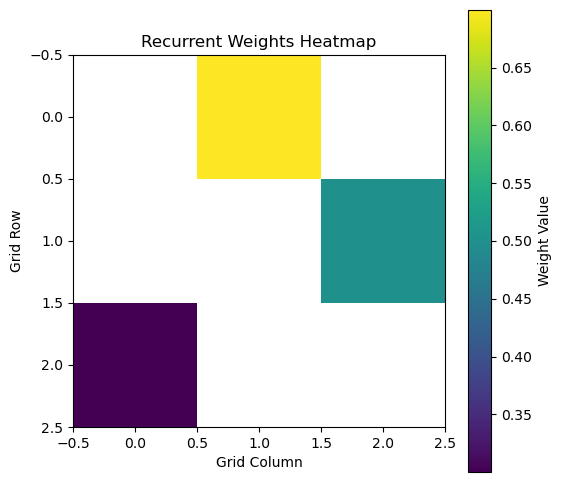

In [13]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax

# Example neuron positions on a grid (N, 2), with each row being a neuron position (row, col)
neuron_positions = jnp.array([
    [1, 2],  # Neuron 0 is at (1, 2) on the grid
    [0, 1],  # Neuron 1 is at (0, 1)
    [2, 0],  # Neuron 2 is at (2, 0)
    # Add more neurons as needed
])

# Example weights array with shape (n_rec, 1), assuming these are the recurrent weights
# (using a single column for the weight values)
weights = jnp.array([
    [0.5],   # Weight corresponding to Neuron 0
    [0.7],   # Weight corresponding to Neuron 1
    [0.3],   # Weight corresponding to Neuron 2
    # Add more weights as needed
])

# Flatten weights to a 1D array for easier indexing
weights_flat = weights.flatten()

# Determine the size of the grid based on the max neuron positions
grid_size = (jnp.max(neuron_positions[:, 0]) + 1, jnp.max(neuron_positions[:, 1]) + 1)

# Create a 2D grid initialized with NaNs or zeros (depends on your preference)
grid = jnp.full(grid_size, jnp.nan)

# Populate the grid with weights using the neuron positions
grid = grid.at[neuron_positions[:, 0], neuron_positions[:, 1]].set(weights_flat)

# Convert to NumPy array for plotting since Matplotlib needs NumPy arrays
grid_np = jax.device_get(grid)

# Plotting the heatmap
plt.figure(figsize=(6, 6))
plt.imshow(grid_np, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Weight Value')
plt.title('Recurrent Weights Heatmap')
plt.xlabel('Grid Column')
plt.ylabel('Grid Row')
plt.show()
